## Transfer Learning Resnet 50 andResnet 50 using Keras

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [3]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 38s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [6]:
folders

['Datasets/Datasets/train\\audi',
 'Datasets/Datasets/train\\lamborghini',
 'Datasets/Datasets/train\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp\ipykernel_17396\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 11s 6s/step - loss: 4.6667 - accuracy: 0.2812 - val_loss: 8.2422 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 6.7811 - accuracy: 0.3906 - val_loss: 11.6531 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 8.2631 - accuracy: 0.3125 - val_loss: 5.7597 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 3.9724 - accuracy: 0.3438 - val_loss: 2.8022 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 3.4198 - accuracy: 0.4688 - val_loss: 4.0304 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 4.0535 - accuracy: 0.3906 - val_loss: 1.7681 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 8s 5s/step - loss: 1.6435 - accuracy: 0.5781 - val_loss: 1.9840 - val_accuracy: 0.3793
Epoch 8/50
2/2 [=======================

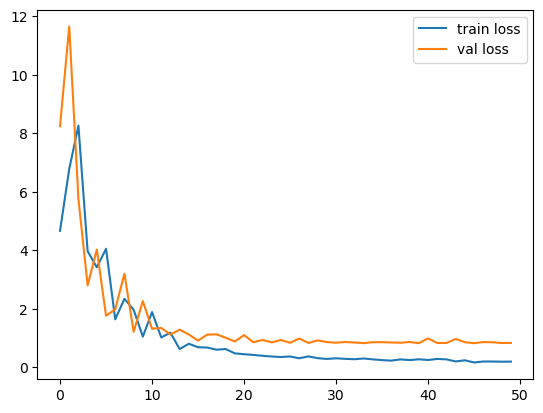

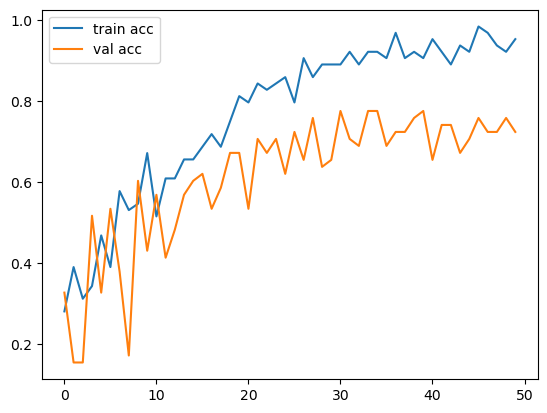

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], 
         label='val acc')
plt.legend()
plt.show()


In [35]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('car_brand_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


2/2 [==============================] - 5s 2s/step


In [18]:
y_pred

array([[7.61365592e-02, 5.59252143e-01, 3.64611268e-01],
       [4.46087979e-02, 5.99941006e-03, 9.49391723e-01],
       [6.89759036e-04, 8.15342903e-01, 1.83967322e-01],
       [8.33368540e-01, 1.15837619e-01, 5.07938154e-02],
       [2.43375003e-02, 3.39705468e-04, 9.75322783e-01],
       [1.62111837e-02, 2.18294024e-01, 7.65494883e-01],
       [1.37265429e-01, 6.83472812e-01, 1.79261744e-01],
       [2.48402227e-02, 6.18017554e-01, 3.57142210e-01],
       [6.58766329e-01, 2.60702848e-01, 8.05307403e-02],
       [6.55089140e-01, 3.38082671e-01, 6.82822289e-03],
       [1.76906083e-02, 8.31390083e-01, 1.50919259e-01],
       [3.29208598e-02, 9.57172692e-01, 9.90641117e-03],
       [1.88450352e-03, 9.84696746e-01, 1.34187602e-02],
       [1.99614316e-02, 7.69231379e-01, 2.10807189e-01],
       [9.66458678e-01, 1.68963764e-02, 1.66449826e-02],
       [3.97007989e-06, 1.82125135e-03, 9.98174787e-01],
       [1.65263880e-02, 8.93148780e-01, 9.03248265e-02],
       [2.02284515e-01, 4.57014

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('car_brand_resnet50.h5')

In [24]:
img=image.load_img('input/lamborghini_1.jpg',target_size=(224,224))



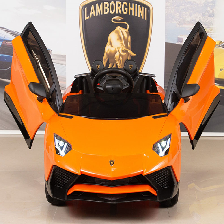

In [25]:
img

In [26]:
x=image.img_to_array(img)
x

array([[[240., 240., 240.],
        [240., 240., 240.],
        [240., 240., 240.],
        ...,
        [236., 232., 229.],
        [236., 233., 228.],
        [235., 232., 227.]],

       [[240., 240., 240.],
        [240., 240., 240.],
        [240., 240., 240.],
        ...,
        [236., 232., 229.],
        [237., 234., 229.],
        [237., 234., 229.]],

       [[240., 240., 240.],
        [240., 240., 240.],
        [239., 239., 239.],
        ...,
        [237., 233., 230.],
        [237., 233., 230.],
        [238., 234., 231.]],

       ...,

       [[224., 208., 195.],
        [224., 208., 195.],
        [225., 207., 195.],
        ...,
        [227., 211., 186.],
        [228., 210., 190.],
        [229., 211., 191.]],

       [[225., 211., 200.],
        [225., 211., 200.],
        [226., 209., 199.],
        ...,
        [230., 212., 192.],
        [229., 210., 193.],
        [229., 210., 193.]],

       [[227., 213., 202.],
        [227., 213., 202.],
        [229., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.00553133, 0.03617917, 0.95828956]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 133ms/step


In [32]:
a

array([2], dtype=int64)

In [33]:
if a ==0:
    print('Its Audi')
elif a==1:
    print('Its Mercedes')
else:
    print('Its Lamboghini')

Its Lamboghini
